In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook

# 전체 코드 출력
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [54]:
# 한글 문제
# matplotlit의 기본 폰트에서 한글 지원되지 않기 때문에
# matplotlib의 폰트 변경 필요
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

## 1. 연령별 교통사고 사망자 시각화

In [55]:
data=pd.read_csv('../[0]data/0-1_전국_연령층별_교통사고_사상자(결과).csv',index_col=0)
data

,사망자수,부상자수,사상자수대비 사망자 비율
연령층별,,,
12세이하,28.0,14115.0,0.20
13-20세,108.0,19884.0,0.54
21-30세,247.0,58010.0,0.42
31-40세,231.0,59022.0,0.39
41-50세,324.0,60127.0,0.54
51-60세,614.0,64455.0,0.94
61-64세,271.0,21608.0,1.24
65세이상,1523.0,44390.0,3.32


<Figure size 720x432 with 0 Axes>

<BarContainer object of 8 artists>

Text(0.5, 1.0, '<연령대별 사상자수 대비 사망자 비율>')

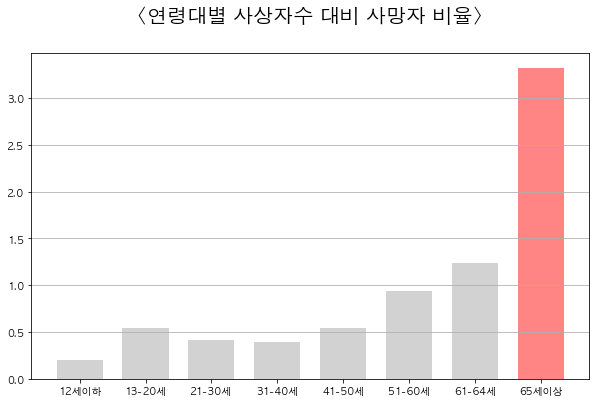

In [56]:
plt.figure(figsize=(10,6))
plt.bar(data.index,data['사상자수대비 사망자 비율'],color=['silver','silver','silver','silver','silver','silver','silver','#FF5252'],alpha=0.7,width=0.7)
plt.title('<연령대별 사상자수 대비 사망자 비율>',fontsize=20,pad=30,fontweight="bold")
plt.grid(True,axis='y')

plt.savefig('../[0]data/1-1-1_시각화_연령대별_사상자수_대비_사망자_비율(결과).png')

In [57]:
data

,사망자수,부상자수,사상자수대비 사망자 비율
연령층별,,,
12세이하,28.0,14115.0,0.20
13-20세,108.0,19884.0,0.54
21-30세,247.0,58010.0,0.42
31-40세,231.0,59022.0,0.39
41-50세,324.0,60127.0,0.54
51-60세,614.0,64455.0,0.94
61-64세,271.0,21608.0,1.24
65세이상,1523.0,44390.0,3.32


In [58]:
# ~20 : 유아.청소년 / 21~64 : 청,장년층 / 65~ : 노인
data.T

연령층별,12세이하,13-20세,21-30세,31-40세,41-50세,51-60세,61-64세,65세이상
사망자수,28.0,108.00,247.00,231.00,324.00,614.00,271.00,1523.00
부상자수,14115.0,19884.00,58010.00,59022.00,60127.00,64455.00,21608.00,44390.00
사상자수대비 사망자 비율,0.2,0.54,0.42,0.39,0.54,0.94,1.24,3.32


In [59]:
new_data = data.T

In [60]:
new_data['유아/청소년층']=new_data['12세이하']+new_data['13-20세']
new_data['청/장년층'] = new_data['21-30세']+new_data['31-40세']+new_data['41-50세']+new_data['51-60세']+new_data['61-64세']
new_data['노인층'] = new_data['65세이상']

In [61]:
data = new_data.T
data

,사망자수,부상자수,사상자수대비 사망자 비율
연령층별,,,
12세이하,28.0,14115.0,0.20
13-20세,108.0,19884.0,0.54
21-30세,247.0,58010.0,0.42
31-40세,231.0,59022.0,0.39
41-50세,324.0,60127.0,0.54
51-60세,614.0,64455.0,0.94
61-64세,271.0,21608.0,1.24
65세이상,1523.0,44390.0,3.32
유아/청소년층,136.0,33999.0,0.74


In [62]:
data["사상자수대비 사망자 비율"]=((data['사망자수']/(data["사망자수"]+data["부상자수"]))*100).round(2)

In [63]:
data

,사망자수,부상자수,사상자수대비 사망자 비율
연령층별,,,
12세이하,28.0,14115.0,0.20
13-20세,108.0,19884.0,0.54
21-30세,247.0,58010.0,0.42
31-40세,231.0,59022.0,0.39
41-50세,324.0,60127.0,0.54
51-60세,614.0,64455.0,0.94
61-64세,271.0,21608.0,1.24
65세이상,1523.0,44390.0,3.32
유아/청소년층,136.0,33999.0,0.40


In [64]:
per_data = data.iloc[[8,9,10]]

<Figure size 720x720 with 0 Axes>

<BarContainer object of 3 artists>

Text(0.5, 1.0, '<연령층별 사상자수 대비 사망자 비율>')

Text(0.5, 0, '연령층')

Text(0, 0.5, '사상자수 대비 사망자 비율')

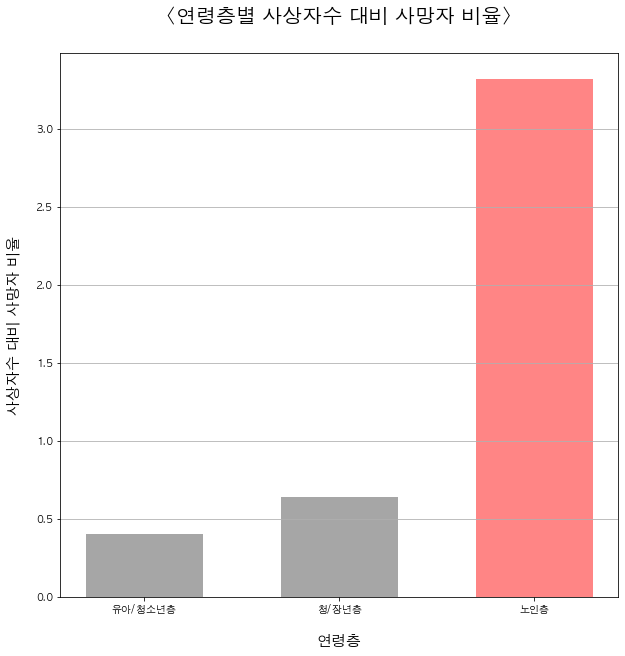

In [65]:
plt.figure(figsize=(10,10))
plt.bar(per_data.index,per_data['사상자수대비 사망자 비율'],color=('gray','gray','#FF5252'),alpha=0.7,width=0.6)
plt.title('<연령층별 사상자수 대비 사망자 비율>',fontsize=20,pad=30,fontweight="bold")

plt.grid(True,axis='y')
plt.xlabel('연령층',labelpad=20,fontsize=15)
plt.ylabel('사상자수 대비 사망자 비율',labelpad=15,fontsize=15)

plt.savefig('../[0]data/1-1-2_시각화_연령층별_사상자수_대비_사망자_비율(결과).png')

<Figure size 720x720 with 0 Axes>

Text(0.5, 1.0, '<연령층별 교통사고 사망자 비율>')

([<matplotlib.patches.Wedge at 0x7fd562e4bd60>,
 [Text(-1.0979643756501203, -0.0668896838327244, '유아/청소년층'),
  Text(1.1268723407565626, 0.6481965193040036, '노인층'),
  Text(-0.7582752225926034, -0.7968805975816817, '청/장년층')],
 [Text(-0.5988896594455201, -0.03648528209057694, '9.2 %'),
  Text(0.6934599020040384, 0.3988901657255407, '76.1 %'),
  Text(-0.4136046668686927, -0.4346621441354627, '14.7 %')])

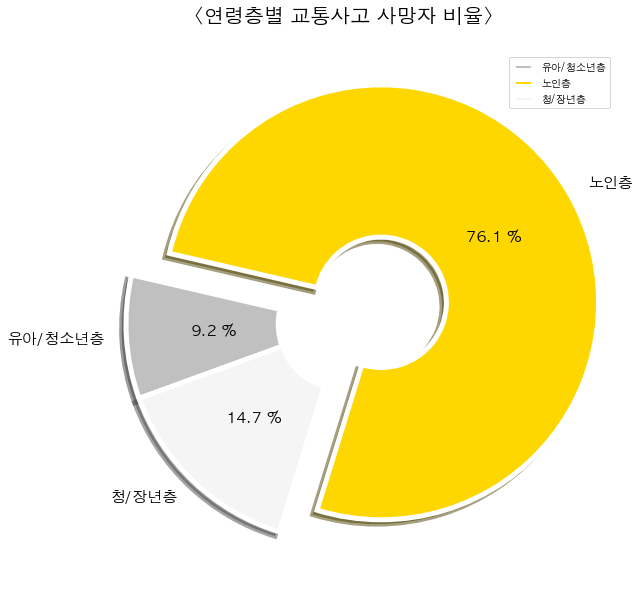

In [66]:
labels=['유아/청소년층', '노인층', '청/장년층']
size=[0.4,3.32,0.64]
colors=['silver','gold','whitesmoke']
explode=[0,0.2,0]

plt.figure(figsize=(10,10))
plt.title('<연령층별 교통사고 사망자 비율>',fontsize=20,pad=30,fontweight="bold")
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.pie(size, labels=labels, colors=colors, explode=explode,startangle=200, autopct='%1.1f %%',counterclock=False, shadow=True,
       wedgeprops=wedgeprops,textprops = {'fontsize':15})
plt.legend(labels=labels, loc='upper right')

plt.savefig('../[0]data/1-1-3_시각화_연령층별_사상자수_대비_사망자_비율(결과).png')